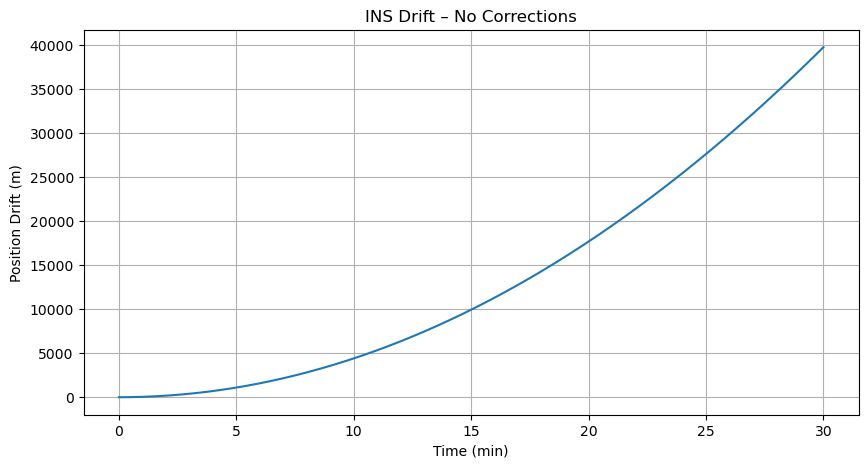

In [2]:
import numpy as np
import matplotlib.pyplot as plt

dt = 0.01      # 100 Hz IMU
T = 1800       # 30 minutes
N = int(T / dt)

acc_bias = np.array([0.01, 0.01, 0.02])  # m/s^2

state = np.zeros(6)   # x y z vx vy vz
states = np.zeros((N, 6))

for i in range(N):
    acc = acc_bias + np.random.randn(3) * 0.02
    state[3:] += acc * dt
    state[:3] += state[3:] * dt
    states[i] = state

t = np.arange(N) * dt / 60  # minutes
drift = np.linalg.norm(states[:, :3], axis=1)

plt.figure(figsize=(10,5))
plt.plot(t, drift)
plt.xlabel("Time (min)")
plt.ylabel("Position Drift (m)")
plt.title("INS Drift – No Corrections")
plt.grid(True)
plt.show()
